<a href="https://colab.research.google.com/github/Shiwaninayak/KNN-and-Naive-Bayes-assessment-IITD-FSM/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [ ]:
#train data
df=pd.read_csv('/content/train.csv')

#test data
df_test=pd.read_csv('/content/test.csv')

In [18]:
df.head

<bound method NDFrame.head of       PassengerId  Survived  Pclass  \
0             1.0       0.0     3.0   
1             2.0       1.0     1.0   
2             3.0       1.0     3.0   
3             4.0       1.0     1.0   
4             5.0       0.0     3.0   
...           ...       ...     ...   
887         888.0       1.0     1.0   
888         889.0       0.0     3.0   
889         890.0       1.0     1.0   
890         891.0       0.0     3.0   
1043          NaN       NaN     NaN   

                                                   Name  Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris  0.0  22.0    1.0   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  1.0  38.0    1.0   
2                                Heikkinen, Miss. Laina  1.0  26.0    0.0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  1.0  35.0    1.0   
4                              Allen, Mr. William Henry  0.0  35.0    0.0   
...                                    

In [19]:
df['Embarked'].value_counts()

1.0    644
2.0    169
3.0     78
Name: Embarked, dtype: int64

In [21]:
df['Embarked'].isna().sum()

1

In [22]:
print(df["Embarked"].mode())
df["Embarked"] = df["Embarked"].fillna("S")

0    1.0
Name: Embarked, dtype: float64


In [2]:
k = 3

# Mapping of categorical variables to numerical values

df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':1,'C':2,'Q':3})
print(np.sum(df.isna()))

# Drop useless columns

df_test.drop(["Cabin","Name","PassengerId","Ticket","SibSp", "Parch"],axis=1,inplace=True)


# Fill missing values in 'Age' and 'Embarked' columns

df['Age']=df['Age'].fillna(method='backfill')
df['Embarked']=df['Embarked'].fillna(method='ffill')

# the mean of Fare for the Pclass 3
df_Pclass_mean = df[df['Pclass'] == 1]['Fare'].mean()

# fill NaN value in Fare column with mean
df.loc[1043, 'Fare'] = df_Pclass_mean

df.isnull().sum()


df_test['Age']=df['Age'].fillna(method='backfill')
df_test['Embarked']=df['Embarked'].fillna(method='ffill')


print(np.sum(df.isna()))
print(df.columns)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age              1
SibSp            1
Parch            1
Ticket           1
Fare             0
Cabin          688
Embarked         1
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
df.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [17]:
df.shape

(892, 12)

In [15]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,892.000000,891.000000,891.000000,892.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.869585,0.523008,0.381594,32.262448,1.364759
std,257.353842,0.486592,0.836071,0.477990,14.589503,1.102743,0.806057,49.695985,0.638162
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.917700,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.068750,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


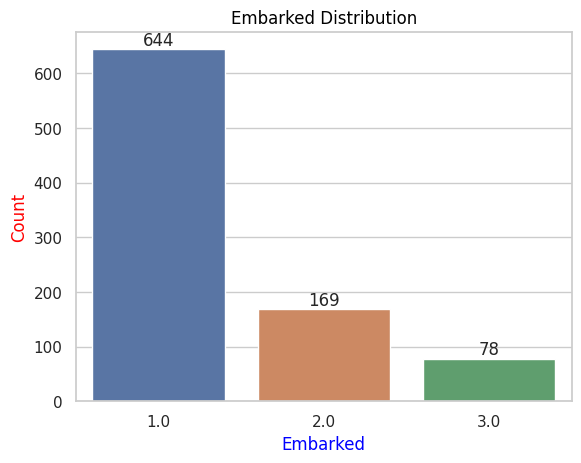

In [3]:
ax = sns.set(style="whitegrid")

ax = sns.countplot(data=df,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='black',loc='center');

# Set the label for the x-axis
plt.xlabel('Embarked',color='blue',loc='center')

# Set the label for the y-axis
plt.ylabel('Count',color='Red',loc='center');

plt.show()

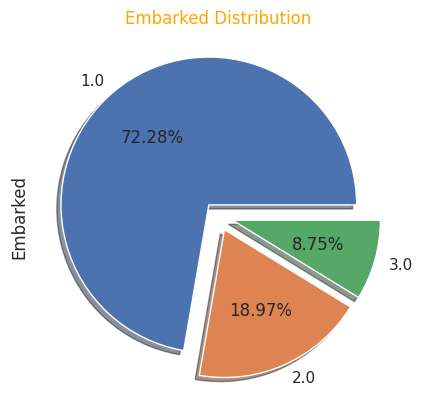

In [4]:
df['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='orange',loc='center');

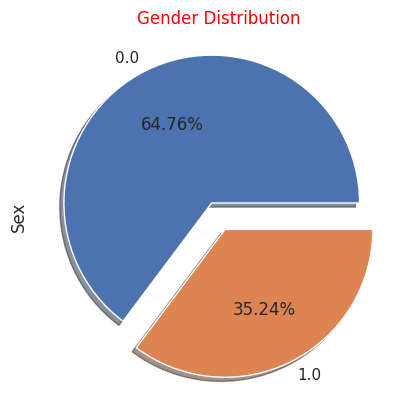

In [5]:
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

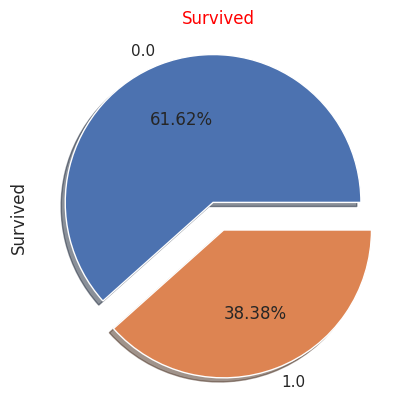

In [6]:
df['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

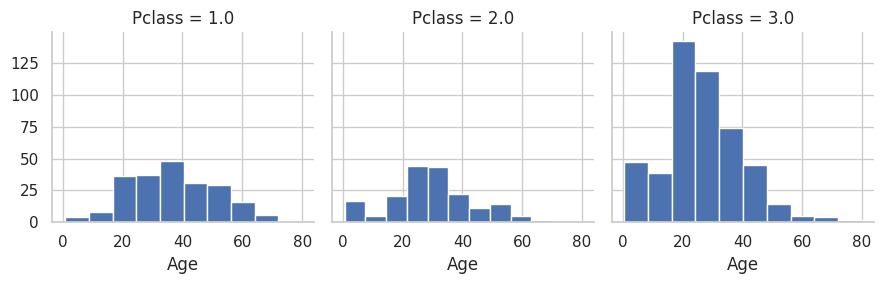

In [7]:
a = sns.FacetGrid(df, col="Pclass")
a = a.map(plt.hist, "Age")

<ipython-input-9-30126efa7837>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


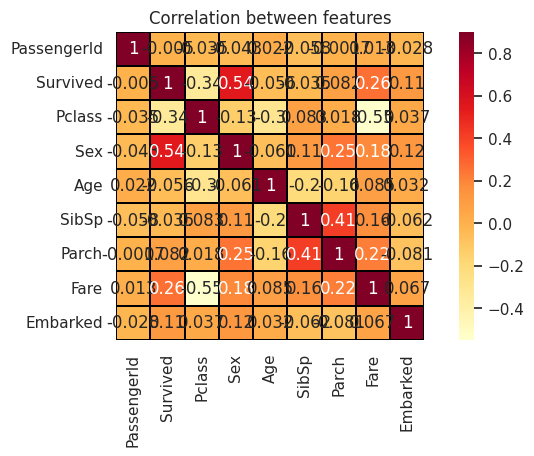

In [9]:
corr=df.corr()
plt.figure(figsize=(9, 4))
sns.heatmap(corr, vmax=.9, linewidths=0.02, square=True,annot=True,cmap='YlOrRd',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [23]:
# take out the input features and target variable

y=df[['Survived']].values
x=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

#K-Nearest Nneighbors classifier

def dif(x_t,k):
    diff=[]
    
    for i in range(len(x)):
        sum=0
        
        for j in range(7):
            a=((x[i][j]-x_t[j])**2)
            sum+=a
        diff.append(sum**0.5)
        
    di=np.array(diff)
    dif=pd.Series(di)
    
    df1=df.assign(Diff=dif)
    y1=df1[['Survived','Diff']]
    min2=y1.sort_values('Diff')  
    select=min2[:k]
    a=list(select['Survived'])
    a_0=a.count(0)
    a_1=a.count(1)
    if a_0 > a_1:
        return 0
    else:
        return 1    

In [11]:
# Read the test data

test_df=pd.read_csv(r'/content/test.csv')

# Map categorical variables to numerical values

test_df['Sex']=test_df['Sex'].map({'male':0,'female':1})
test_df['Embarked']=test_df['Embarked'].map({'S':1,'C':2,'Q':3})
print(np.sum(df.isna()))

# Drop useless columns

test_df=test_df.drop(['Cabin'],axis=1)

# Fill missing values in 'Age' and 'Embarked' columns

test_df['Age']=test_df['Age'].fillna(method='backfill')
test_df['Embarked']=test_df['Embarked'].fillna(method='ffill')

# Extract test features

test_x=test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

test_y=[]

print(test_x)

PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age              1
SibSp            1
Parch            1
Ticket           1
Fare             0
Cabin          688
Embarked         1
dtype: int64
[[ 3.      0.     34.5    ...  0.      7.8292  3.    ]
 [ 3.      1.     47.     ...  0.      7.      1.    ]
 [ 2.      0.     62.     ...  0.      9.6875  3.    ]
 ...
 [ 3.      0.     38.5    ...  0.      7.25    1.    ]
 [ 3.      0.         nan ...  0.      8.05    1.    ]
 [ 3.      0.         nan ...  1.     22.3583  2.    ]]


In [13]:
def test(x_t,k):
    
    for i in range(len(test_x)):
        t_y=dif(x_t[i],k)
        
        test_y.append(t_y)
    print(test_y)


# Perform k-NN classification on the test data

test(test_x,k)

t_1=test_y.count(1)
t_0=test_y.count(0)

y=[]
y.append(t_1)
y.append(t_0)

[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

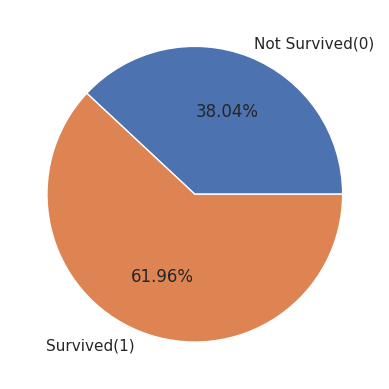

In [14]:
plt.pie(y,labels=['Not Survived(0)','Survived(1)'],autopct='%1.2f%%')
plt.show()